# Analyse the input data 

In this notebook, I will:  
1.  Analyse the training and dev dataset
  * Count the total number of samples in each dataset
  * Count the occurrences of each label in both datasets
  * Calculate the class distribution percentages.
2. Calculate the majority class baseline (NN - 1)
   1. Identify the most frequent label in the training set, and calculate its percentage
   2. The same for dev set
3. Examine the visualised distribution of classes in both datasets
4. 
   

In [7]:
# Loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter
import re

# Set style for plots
plt.style.use('seaborn-v0_8-whitegrid')

## 1. Basic analysis of the  two  datasets

Define necessary functions 

In [13]:
def read_corpus(file_path):
    '''
    Read the corpus file and return lists of names and labels
    '''
    names, labels = [], []
    with open(file_path, "r", encoding = 'utf-8') as file:
        for line in file:
            name, label = line.strip().split()
            names.append(name)
            labels.append(label)
    return names, labels

def analyse_dataset(file_path):
    '''
    Analyse the dataset 
    Return statistic results
    '''
    names, labels = read_corpus(file_path)
    total_samples = len(names)
    label_counter = Counter(labels)
    label_percentage = {label: count/total_samples * 100 for label, count in label_counter.items()}
    
    return {
        'total_samples': total_samples,
        'label_counts': label_counter,
        'label_percentage': label_percentage
    }

Analyse both datasets

In [14]:
train_analysis = analyse_dataset('/Users/hongxuzhou/LfD/week2/LfDWeek2/data/train_NE.txt')
dev_analysis = analyse_dataset('/Users/hongxuzhou/LfD/week2/LfDWeek2/data/dev_NE.txt')

print('Training set analysis:')
print(json.dumps(train_analysis, indent = 2))
print('\nDevelopment set analysis:')
print(json.dumps(dev_analysis, indent = 2))


Training set analysis:
{
  "total_samples": 3156,
  "label_counts": {
    "PERSON": 820,
    "CARDINAL": 467,
    "DATE": 244,
    "GPE": 557,
    "ORG": 1068
  },
  "label_percentage": {
    "PERSON": 25.982256020278832,
    "CARDINAL": 14.797211660329532,
    "DATE": 7.731305449936629,
    "GPE": 17.6489226869455,
    "ORG": 33.840304182509506
  }
}

Development set analysis:
{
  "total_samples": 500,
  "label_counts": {
    "ORG": 157,
    "PERSON": 120,
    "GPE": 100,
    "CARDINAL": 77,
    "DATE": 46
  },
  "label_percentage": {
    "ORG": 31.4,
    "PERSON": 24.0,
    "GPE": 20.0,
    "CARDINAL": 15.4,
    "DATE": 9.2
  }
}


## 2. Calculating majority class baseline

Prepare function

In [15]:
def get_majority_baseline(analysis):
    majority_label = max(analysis['label_counts'], key=analysis['label_counts'].get)
    
    return majority_label, analysis['label_percentage'][majority_label]

In [16]:
train_majority_label, train_majority_baseline = get_majority_baseline(train_analysis)
dev_majority_label, dev_majority_baseline = get_majority_baseline(dev_analysis)

print(f"Training set majority class: {train_majority_label}, baseline accuracy: {train_majority_baseline: .2f}%")
print(f'Development set majority class: {dev_majority_label}, baseline accuracy: {dev_majority_baseline: .2f}%')

Training set majority class: ORG, baseline accuracy:  33.84%
Development set majority calss: ORG, baseline accuracy:  31.40%


Visualise the class distribution

In [17]:
def plot_label_distribution(analysis, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(analysis['label_counts'].keys()), y=list(analysis['label_counts'].values()))
    plt.title(title)
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show

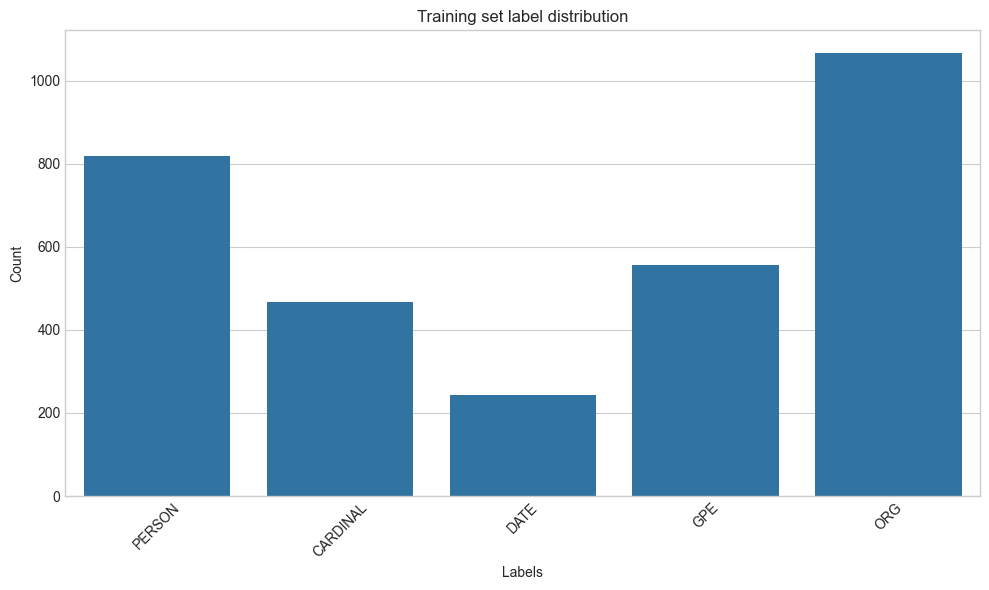

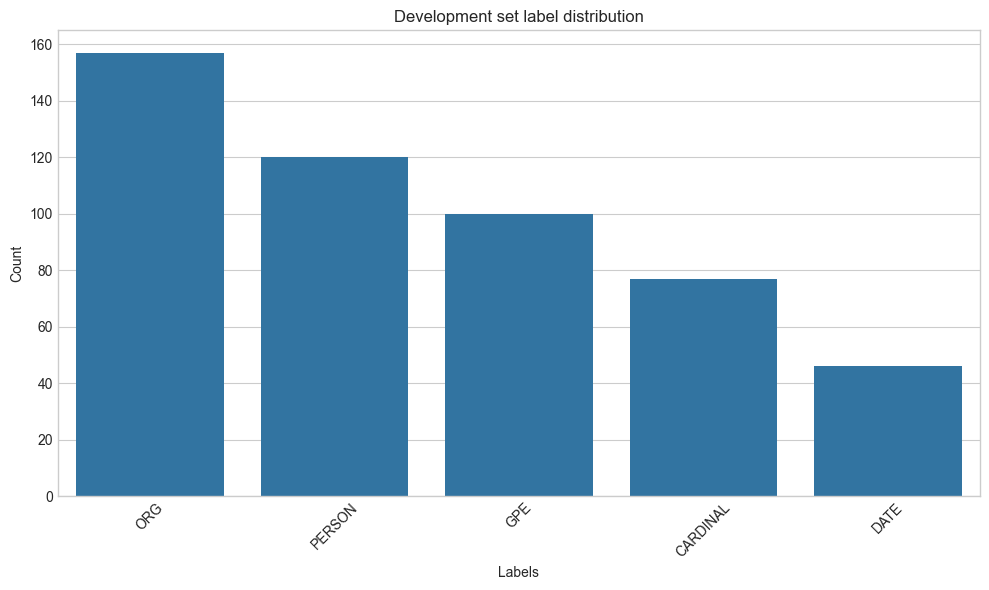

In [18]:
plot_label_distribution(train_analysis, 'Training set label distribution')
plot_label_distribution(dev_analysis, 'Development set label distribution')

### Calculating Out-of-vocabulary (OOV)

Step 1, analyse the GloVe file.

In [22]:
# Analyze word embeddings
def analyse_embeddings(embeddings_file = '/Users/hongxuzhou/LfD/week2/LfDWeek2/data/glove_filtered.json'):
    with open(embeddings_file, 'r') as f:
        embeddings = json.load(f)
    
    total_words = len(embeddings)
    dimensionality = len(next(iter(embeddings.values())))
    
    return {
        'total_words': total_words,
        'dimensionality': dimensionality
    }



In [24]:
embeddings_analysis = analyse_embeddings()
print("Word embeddings analysis:")
print(json.dumps(embeddings_analysis, indent=2))

Word embeddings analysis:
{
  "total_words": 4156,
  "dimensionality": 300
}


Step 2. Analyse the OOV words

In [25]:
def analyse_oov_words(file_path, embeddings_file):
    names, _ = read_corpus(file_path)
    with open(embeddings_file, 'r') as f:
        embeddings = json.load(f)
    
    oov_words = [name for name in names if name.lower() not in embeddings]
    oov_percentage = len(oov_words) / len(names) * 100
    
    return {
        'oov_percentage': oov_percentage,
        'oov_examples': oov_words[:5]  # Just show first 5 examples
    }

Provide the results

In [27]:
train_text = '/Users/hongxuzhou/LfD/week2/LfDWeek2/data/train_NE.txt'
glove_filtered = '/Users/hongxuzhou/LfD/week2/LfDWeek2/data/glove_filtered.json'

train_oov_analysis = analyse_oov_words(train_text, glove_filtered)
print("Out-of-vocabulary analysis (Training set):")
print(json.dumps(train_oov_analysis, indent=2))

Out-of-vocabulary analysis (Training set):
{
  "oov_percentage": 0.0,
  "oov_examples": []
}


The summary

In [28]:
print("\nSummary:")
print(f"Majority class baseline (Training): {train_majority_baseline:.2f}%")
print(f"Majority class baseline (Development): {dev_majority_baseline:.2f}%")
print(f"OOV percentage in training set: {train_oov_analysis['oov_percentage']:.2f}%")
print(f"Embedding dimensionality: {embeddings_analysis['dimensionality']}")


Summary:
Majority class baseline (Training): 33.84%
Majority class baseline (Development): 31.40%
OOV percentage in training set: 0.00%
Embedding dimensionality: 300
